<h1>Python Tutorial - Predicting survival rates on the Titanic</h1>

<h3>Importing libraries and packages</h3>

    Pandas: Will make our data easier to use by converting the datasets into dataframes, as in R
    Numpy: Will allow us to manipulate data in multidimensional array
    Sklearn: Machine learning library that contains functions that can be used to run statisical models
    Matplotlib: Helps us make visualizations like graphs and charts

In [48]:
# Import

# pandas
import pandas as pd
from pandas import Series,DataFrame

In [49]:
# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [50]:
# numpy, matplotlib, seaborn
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#pip install seaborn
#import seaborn as sns
#sns.set_style('whitegrid')


    Now that we've imported the libraries, let's read in the training and test datasets.

    We can do this by using the the read_csv command from the Pandas package

<h3> Reading in data

In [51]:
titanic_df = pd.read_csv("C:/Users/jimfeter/Downloads/train.csv")
test = pd.read_csv("C:/Users/jimfeter/Downloads/test.csv")

    Let's inspect our datasets so we know what we're working with

In [52]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [53]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


<h3> Cleaning data<h3>


    
    We can start preparing our data for analysis by removing the columns that won't be useful in a predictive model.

    Variables like the passenger's name, the ticket number, and passenger ID will not be helpful. 



In [54]:
titanic_df = titanic_df.drop(["Ticket", "Name", "PassengerId"], axis = 1)
test = test.drop(["Name", "Ticket"], axis= 1)

    Now we can deal with another important process in preparing our data: imputing missing values.<b>

    Let's check how many values are missing in each column in our dataset.

In [55]:
titanic_df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [56]:
test.isnull().sum()

PassengerId      0
Pclass           0
Sex              0
Age             86
SibSp            0
Parch            0
Fare             1
Cabin          327
Embarked         0
dtype: int64

    Great. 
    
    We see that in the training set, embarked is missing only two values. We can quickly fill those in with the value that shows up the most in 'Embarked'.

In [57]:
titanic_df[["Embarked", "Survived"]].groupby(["Embarked"], as_index = False).sum()

,Embarked,Survived
0,C,93
1,Q,30
2,S,217


In [58]:
titanic_df['Embarked'] = titanic_df['Embarked'].fillna("S")

In [59]:
embarky = titanic_df[["Embarked", "Survived"]].groupby(["Embarked"], as_index = False).mean()

In [60]:
embarky.head()


,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


    The 'Fare' column in the test set has a missing value that also needs imputing. 
    Let's clean this up with quick fix. Fill in the missing value with the median of the 'fare' column 

In [61]:
test['Fare'].fillna(test['Fare'].median(), inplace = True)
#inplace makes the change on the current dataset


    To be useful in our analysis, the fare values should be intergers. 
    We should make sure that they are.

In [62]:
titanic_df['Fare'].dtype == int

False

In [63]:
test['Fare'].dtype == int

False

    Looks like they're not! They're actually inputted as floats. Let's change them to intergers!

In [64]:
#change data type from float to int
titanic_df['Fare'] = titanic_df['Fare'].astype(int)
test['Fare'] = test['Fare'].astype(int)

How to add a new attribute to the dataset:

What if we want to know if people with families had a better chance of surviving than people who were alone.

    Another step in cleaning our data involves extracting features from our data set that can replace other columns. 
    The feature we'll extract is family.
    
    'Family' is a combination of the 'Parch' ('Parents and Children') and 'sibsp' ('Siblings aboard') columns. 
   


In [65]:
#Parch + Sibsp = Family. Does this increase chances of survival
#loc or not?

titanic_df['Family'] = titanic_df['Parch'] + titanic_df['SibSp']
titanic_df['Family'][titanic_df['Family'] > 0] = 1
titanic_df['Family'][titanic_df['Family'] == 0] = 0

test['Family'] = test['Parch'] + test['SibSp']
test['Family'][test["Family"]> 0] = 1
test['Family'][test["Family"] == 0] = 0

titanic_df.drop(["Parch", "SibSp"], axis= 1, inplace =True)
test.drop(["Parch", "SibSp"], axis= 1, inplace =True)


C:\Users\jimfeter\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\jimfeter\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\jimfeter\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\jimfeter\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipy

        Lastly, let's take the age column and impute the missing values with values between (mean - standard deviation) and 
        (mean + standard deviation), which is values that are one standard deviation from the mean

In [72]:

average_age = titanic_df['Age'].mean()
std_age_ = titanic_df['Age'].std()
count_na_titanic = titanic_df['Age'].isnull().sum()

average_aget_ = test['Age'].mean()
std_aget_ = test['Age'].std()
count_nat_ = test['Age'].isnull().sum()

# generate random numbers between (mean - std) & (mean + std)
rand_1 = np.random.randint(average_age - std_age_, average_age + std_age_, size = count_na_titanic)
rand_2 = np.random.randint(average_aget_ - std_aget_, average_aget_ + std_aget_, size = count_nat_)

titanic_df['Age'][titanic_df['Age'].isnull()] = rand_1
test['Age'][test['Age'].isnull()] = rand_2

C:\Users\jimfeter\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\jimfeter\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


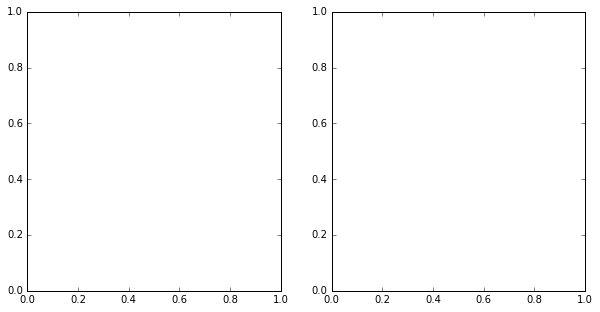

In [74]:
# plot
fig, (axis1,axis2) = plt.subplots(1,2,sharex=True,figsize=(10,5))


In [73]:
titanic_df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
Embarked    0
Family      0
dtype: int64

    Cabin - might be useful, but we'll look at it another time. Drop it!

In [71]:
titanic_df.drop('Cabin',axis = 1, inplace = True)
test.drop('Cabin', axis = 1, inplace = True)

In [80]:
plot

SyntaxError: positional argument follows keyword argument (<ipython-input-80-22f123b7e0ad>, line 1)

<H1> EDITS TO COME

In [234]:
rand1 = np.random.randint(average_age - std_age_, average_age + std_age_, size = count_na_titanic)
rand2 = np.random.randint(average_aget_ - std_aget_, average_aget_ + std_aget_, size = count_nat_)

In [235]:
len(rand1)

177

In [236]:
titanic_df['Age'].isnull().sum()

177

In [237]:
titanic_df['Age'] = titanic_df['Age'].astype(float)
test['Age'] = test['Age'].astype(float)

C:\Users\jimfeter\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\jimfeter\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


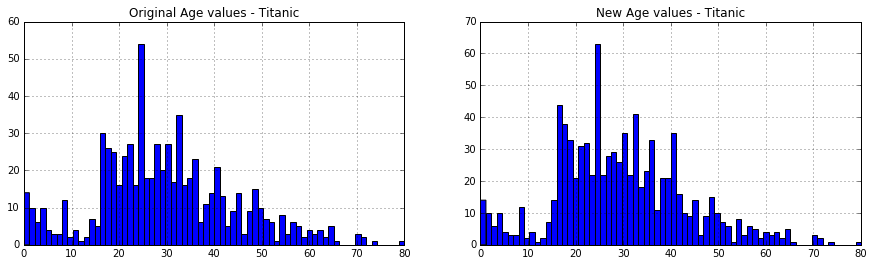

C:\Users\jimfeter\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\indexing.py:128: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [260]:
#Person column. Children == somoene under the age of 16. More likely to survive 

def get_person(passenger):
    Age, Sex = passenger
    return 'Child' if Age < 16 else Sex

titanic_df['Person'] = titanic_df[['Age', 'Sex']].apply(get_person, axis = 1)
test['Person'] = test[['Age', 'Sex']].apply(get_person, axis = 1)


titanic_df.drop(['Age','Sex'], axis = 1, inplace = True)
test.drop(['Age', 'Sex'], axis = 1, inplace = True)

#create dummy variables. Drop Male since they have lowest chance of surviving
titanic_df_person_dum = pd.get_dummies(titanic_df['Person'])
titanic_df_person_dum.columns('Child', 'Female', 'Male')
titanic_df_person_dum.drop('Male')

test_person_dum = pd.get_dummies(test['Person'])
test_person_dum.columns('Child', 'Female', 'Male')
test_person.drop('Male')

titanic_df.join(titanic_df_person_dum)
test.join(test_person_dum)


KeyError: "['Age' 'Sex'] not in index"

In [262]:
pclass_dummies_titanic  = pd.get_dummies(titanic_df['Pclass'])
pclass_dummies_titanic.columns = ['Class_1','Class_2','Class_3']
pclass_dummies_titanic.drop(['Class_3'], axis=1, inplace=True)

pclass_dummies_test_  = pd.get_dummies(test['Pclass'])
pclass_dummies_test_.columns = ['Class_1','Class_2','Class_3']
pclass_dummies_test_.drop(['Class_3'], axis=1, inplace=True)

titanic_df.drop(['Pclass'],axis=1,inplace=True)
test.drop(['Pclass'],axis=1,inplace=True)

titanic_df = titanic_df.join(pclass_dummies_titanic)
test_df    = test.join(pclass_dummies_test_)

KeyError: 'Pclass'

In [ ]:
X_train = titanic_df.drop('Survived', axis =1)
Y_train = titanic_df['Survived']
X_test = test.drop("PassengerClass", axis =1).copy()

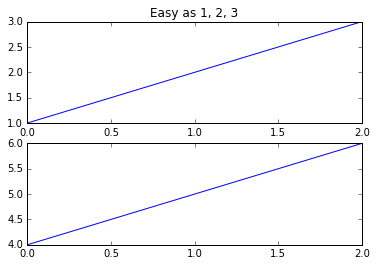

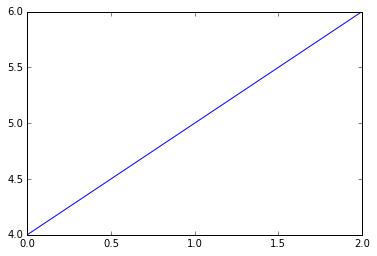

In [75]:
import matplotlib.pyplot as plt
plt.figure(1)                # the first figure
plt.subplot(211)             # the first subplot in the first figure
plt.plot([1, 2, 3])
plt.subplot(212)             # the second subplot in the first figure
plt.plot([4, 5, 6])


plt.figure(2)                # a second figure
plt.plot([4, 5, 6])          # creates a subplot(111) by default

plt.figure(1)                # figure 1 current; subplot(212) still current
plt.subplot(211)             # make subplot(211) in figure1 current
plt.title('Easy as 1, 2, 3') # subplot 211 title

In [ ]:
LogisticRegression.fit(X_train, Y_train)
Y_Pred =LogsiticRegression.predict(X_test)
LogisticRegression.score(X_train, Y_train)